# This is testing tensorflow on the cats and dogs kaggle dataset

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

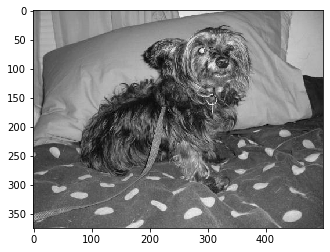

In [15]:
# load in images
DATADIR = '\Data\PetImages'
CATEGORIES = ['Dog', 'Cat']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [13]:
img_array.shape

(375, 500, 3)

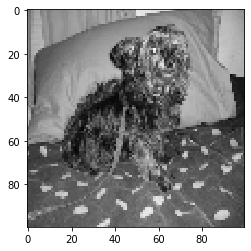

In [21]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')

In [22]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [23]:
print(len(training_data))

24946


In [24]:
import random

random.shuffle(training_data)

In [29]:
X = []
y = []

In [30]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [32]:
import pickle
pickle_out = open('\Data\X.pkl','wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('\Data\y.pkl','wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [33]:
pickle_in = open('\Data\X.pkl', 'rb')
X = pickle.load(pickle_in)

# This is the model training part

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

In [36]:
X = pickle.load(open('\Data\X.pkl', 'rb'))
y = pickle.load(open('\Data\y.pkl', 'rb'))

In [37]:
X = X/255.0

In [42]:
type(X)

numpy.ndarray

In [40]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy', 
             optimizer = 'adam',
             metrics = ['accuracy'])

In [43]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y = np.array(y)

model.fit(X, y, batch_size=32, validation_split=0.1)

Train on 22451 samples, validate on 2495 samples
22451/22451 [==============================] - 351s 16ms/sample - loss: 0.6740 - accuracy: 0.6011 - val_loss: 0.6404 - val_accuracy: 0.6333


# Trying out tensorboard

In [47]:
from tensorflow.keras.callbacks import TensorBoard
import time
NAME = '.\\cats-vs-dogs-cnn-64x2-{}'.format(int(time.time()))
tensorboard = TensorBoard(log_dir = f'logs\\{NAME}')

In [48]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy', 
             optimizer = 'adam',
             metrics = ['accuracy'])

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y = np.array(y)

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.1, callbacks=[tensorboard])

Train on 22451 samples, validate on 2495 samples
Epoch 1/3
22451/22451 [==============================] - 339s 15ms/sample - loss: 0.6171 - accuracy: 0.6620 - val_loss: 0.5514 - val_accuracy: 0.7303
Epoch 2/3
22451/22451 [==============================] - 310s 14ms/sample - loss: 0.5008 - accuracy: 0.7583 - val_loss: 0.4912 - val_accuracy: 0.7579
Epoch 3/3
22451/22451 [==============================] - 308s 14ms/sample - loss: 0.4254 - accuracy: 0.8017 - val_loss: 0.4931 - val_accuracy: 0.7707


# Model tuning

In [49]:
# This will take a long time
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = f'{conv_layer}-conv-{layer_size}-nodes-{dense_layer}-dense-{int(time.time())}'
            print(NAME)
            model = Sequential()
            
            model.add(Conv2D(layer_size, (3,3), input_shape = X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            
            for l in range(conv_layer-1)
                model.add(Conv2D(layer_size, (3,3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Flatten())
            
            for l in range(dense_layer):
                model.add(Dense(512))
                model.add(Activation('relu'))
                model.add(Dropout(0.2))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            model.compile(loss = 'binary_crossentropy', 
                         optimizer = 'adam',
                         metrics = ['accuracy'])

            X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

            y = np.array(y)

            model.fit(X, y, batch_size=32, epochs=3, validation_split=0.1, callbacks=[tensorboard])

1-conv-32-nodes-0-dense-1581798074
2-conv-32-nodes-0-dense-1581798074
3-conv-32-nodes-0-dense-1581798074
1-conv-64-nodes-0-dense-1581798074
2-conv-64-nodes-0-dense-1581798074
3-conv-64-nodes-0-dense-1581798074
1-conv-128-nodes-0-dense-1581798074
2-conv-128-nodes-0-dense-1581798074
3-conv-128-nodes-0-dense-1581798074
1-conv-32-nodes-1-dense-1581798074
2-conv-32-nodes-1-dense-1581798074
3-conv-32-nodes-1-dense-1581798074
1-conv-64-nodes-1-dense-1581798074
2-conv-64-nodes-1-dense-1581798074
3-conv-64-nodes-1-dense-1581798074
1-conv-128-nodes-1-dense-1581798074
2-conv-128-nodes-1-dense-1581798074
3-conv-128-nodes-1-dense-1581798074
1-conv-32-nodes-2-dense-1581798074
2-conv-32-nodes-2-dense-1581798074
3-conv-32-nodes-2-dense-1581798074
1-conv-64-nodes-2-dense-1581798074
2-conv-64-nodes-2-dense-1581798074
3-conv-64-nodes-2-dense-1581798074
1-conv-128-nodes-2-dense-1581798074
2-conv-128-nodes-2-dense-1581798074
3-conv-128-nodes-2-dense-1581798074


In [51]:
model.save('64x3-CNN.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: 64x3-CNN.model\assets


# Load and use model

In [61]:
CATEGORIES = ['Dog', 'Cat']

def prepare(filepath):
    IMG_SIZE = 100
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img_array = img_array/255.0
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model('64x3-CNN.model')

prediction = model.predict([prepare('lebcat2.JPG')])
print(prediction)

[[0.98200846]]


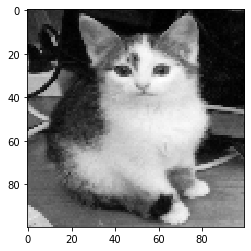

In [62]:
img_array = cv2.imread('lebcat2.JPG', cv2.IMREAD_GRAYSCALE)
img_array = img_array/255.0
img_array = cv2.resize(img_array, (100, 100))
plt.imshow(img_array, cmap='gray')
plt.show()

96.4% sure it's a cat


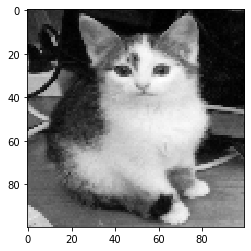

In [75]:
prediction = model.predict([prepare('lebcat2.JPG')])
prediction = prediction[0][0] - 0.5
if prediction < 0:
    #print(prediction)
    print(f'{round(-prediction*100/0.5, 1)}% sure it\'s a cat')
else:
    print(f'{round(prediction*100/0.5, 1)}% sure it\'s a cat')

img_array = cv2.imread('lebcat2.JPG', cv2.IMREAD_GRAYSCALE)
img_array = img_array/255.0
img_array = cv2.resize(img_array, (100, 100))
plt.imshow(img_array, cmap='gray')
plt.show()

53.5% sure it's a cat


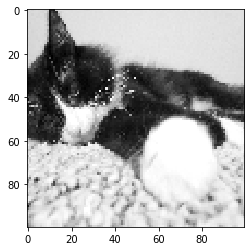

In [76]:
prediction = model.predict([prepare('cat3.JPG')])
prediction = prediction[0][0] - 0.5
if prediction < 0:
    #print(prediction)
    print(f'{round(-prediction*100/0.5, 1)}% sure it\'s a cat')
else:
    print(f'{round(prediction*100/0.5, 1)}% sure it\'s a cat')

img_array = cv2.imread('cat3.JPG', cv2.IMREAD_GRAYSCALE)
img_array = img_array/255.0
img_array = cv2.resize(img_array, (100, 100))
plt.imshow(img_array, cmap='gray')
plt.show()

31.0% sure it's a cat


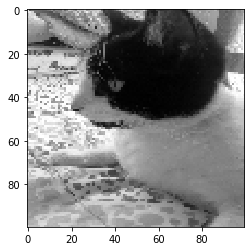

In [77]:
prediction = model.predict([prepare('cat4.JPG')])
prediction = prediction[0][0] - 0.5
if prediction < 0:
    #print(prediction)
    print(f'{round(-prediction*100/0.5, 1)}% sure it\'s a cat')
else:
    print(f'{round(prediction*100/0.5, 1)}% sure it\'s a cat')

img_array = cv2.imread('cat4.JPG', cv2.IMREAD_GRAYSCALE)
img_array = img_array/255.0
img_array = cv2.resize(img_array, (100, 100))
plt.imshow(img_array, cmap='gray')
plt.show()

67.0% sure it's a cat


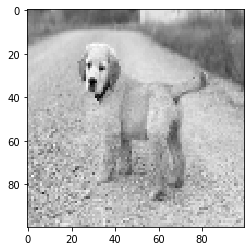

In [86]:
# Seems to be biased towards cats, need a better model

prediction = model.predict([prepare('dog1.JPG')])
prediction = prediction[0][0] - 0.5
if prediction < 0:
    #print(prediction)
    print(f'{round(-prediction*100/0.5, 1)}% sure it\'s a cat')
else:
    print(f'{round(prediction*100/0.5, 1)}% sure it\'s a cat')

img_array = cv2.imread('dog1.JPG', cv2.IMREAD_GRAYSCALE)
img_array = img_array/255.0
img_array = cv2.resize(img_array, (100, 100))
plt.imshow(img_array, cmap='gray')
plt.show()